<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Parking Number  6506 non-null   object
 1   Capacity        6506 non-null   int64 
 2   Occupancy       6506 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 152.6+ KB
1920


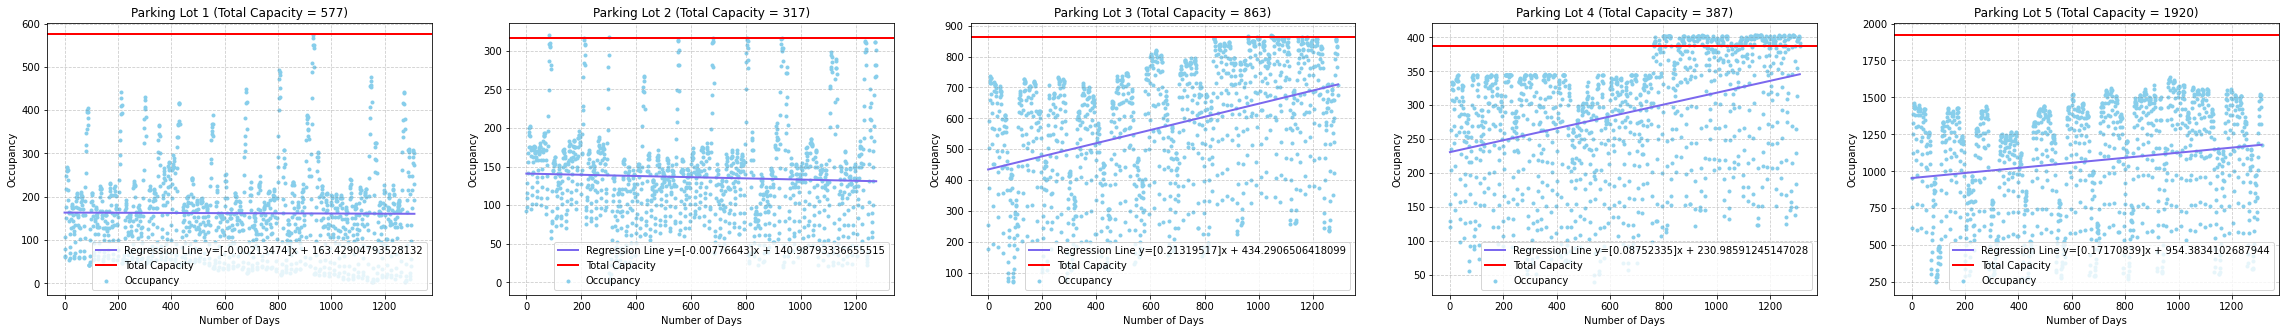

In [ ]:
import numpy
import sklearn
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pandas.read_csv('Parking_lots_dataset.csv')
# print(data)
data.info()
parking_lot_dict = {}

#Splitting the data into 5 subsets of data which separate the different parking lots and their corresponding data
for i in range(5):
  parking_lot_dict[f'parking_lot_{i+1}'] = data[data['Parking Number']==f'Parking lot 0{i+1}']
print(numpy.unique(parking_lot_dict[f'parking_lot_{i+1}']['Capacity'])[0])
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(40,5))
for i in range(5):
  number_of_days = numpy.array(range(parking_lot_dict[f'parking_lot_{i+1}'].shape[0])).reshape(-1,1)
  occupancy = parking_lot_dict[f'parking_lot_{i+1}'].iloc[:,2].values.reshape(-1, 1)
  linear_regression = LinearRegression()
  linear_regression.fit(number_of_days, occupancy)
  linear_regression_line = linear_regression.predict(number_of_days)

  occupancy_data = axes[i].scatter(number_of_days, occupancy, marker='.',color="skyblue")
  regression_line = axes[i].plot(number_of_days, linear_regression_line, color='mediumslateblue', linewidth=2, label="Regression Line")
  total_capacity = numpy.unique(parking_lot_dict[f'parking_lot_{i+1}']['Capacity'])[0]
  axes[i].title.set_text(f"Parking Lot {i+1} (Total Capacity = {total_capacity})")
  axes[i].grid(color='grey', linestyle='--', alpha=0.4)
  axes[i].set_xlabel('Number of Days')
  axes[i].set_ylabel('Occupancy')
  max_capacity_line = axes[i].axhline(y=total_capacity, linewidth=2, color="red")
  axes[i].legend([f"Regression Line y={linear_regression.coef_[0]}x + {linear_regression.intercept_[0]}", "Total Capacity", "Occupancy"], loc='lower right')


# print(parking_lot_dict['parking_lot_1'])